# Neural Style Transfer


## Install Required Library

In [ ]:
!pip install tensorflow tensorflow_hub matplotlib

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

## Function to load image from local path

In [10]:
def load_image(source, max_dim=512):
    if source.startswith('http'):
        response = requests.get(source)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(source)

    img = img.convert('RGB')
    img.thumbnail((max_dim, max_dim))  # Resize image
    return img


## For local image

In [11]:
content_path = "/content/WhatsApp Image 2025-02-11 at 12.06.21_cc8adae0.jpg"
style_path = "/content/wallpaperbetter.jpg"

## Load Images

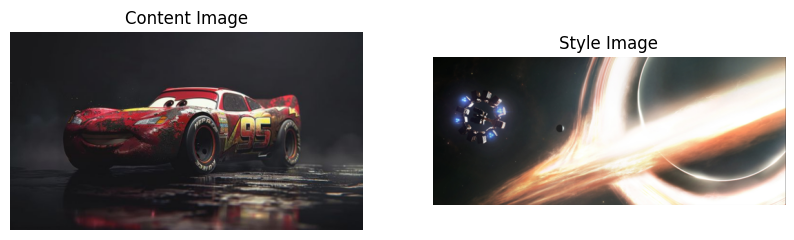

In [16]:
def show_images(content, style):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(tf.squeeze(content))
    plt.title('Content Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(style))
    plt.title('Style Image')
    plt.axis('off')
    plt.show()

# Load the images before showing them
content_image = load_image(content_path)
style_image = load_image(style_path)

show_images(content_image, style_image)

## Style Transfer

In [19]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.cast(content_image, tf.float32)[tf.newaxis, ...], tf.cast(style_image, tf.float32)[tf.newaxis, ...])[0]

## Display Output Image

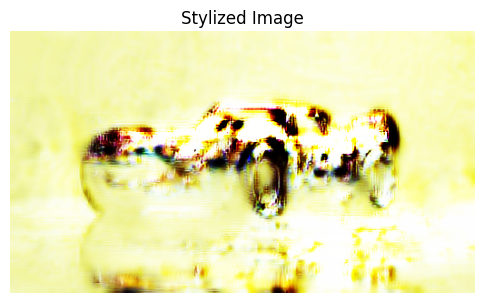

In [20]:
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(stylized_image))
plt.title('Stylized Image')
plt.axis('off')
plt.show()